Que tan bien pagan los empleos y las habilidades para Data Analysts?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

df = pd.read_csv(r'C:\Users\Territorio DSC\Desktop\Python codes\Python practices - Data science\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Limpiar columna de skills
def parse_job_skills(skills):
    if pd.notna(skills):
        return ast.literal_eval(skills)
    return skills

# Aplicar la función a la columna
df['job_skills'] = df['job_skills'].apply(parse_job_skills)

In [2]:
df_US = df[df['job_country'] == 'United States'].dropna(subset = ['salary_year_avg'])
df_US.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."


In [3]:
# Se extraen los 6 puestos de trabajos con mas oferta (incluidos los puestos senior)
nombres_empleos = df_US['job_title_short'].value_counts(ascending = False).head(6).index.tolist()

nombres_empleos

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
# Se filtra el dataframe
df_US_top6 = df_US[df_US['job_title_short'].isin(nombres_empleos)]
df_US_top6.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."


In [5]:
# Crearemos un group by para reordenar los empleos del menor al mayor en base a su mediana
nombres_empleos = df_US_top6.groupby('job_title_short')['salary_year_avg'].agg('median').sort_values(ascending = False).index
nombres_empleos

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

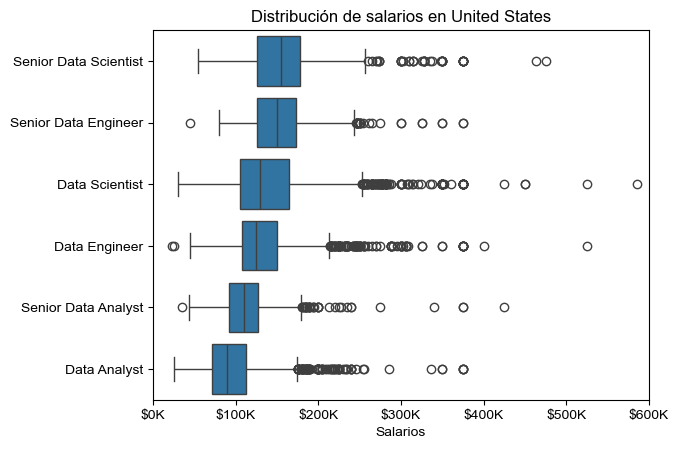

In [6]:
sns.boxplot(data = df_US_top6,
            x = 'salary_year_avg',
            y = 'job_title_short',
            order = nombres_empleos)
sns.set_style(style = 'ticks')

plt.title('Distribución de salarios en United States')
plt.xlabel('Salarios')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

Investigar Mediana de salarios vs habilidades de Data Analysts

In [7]:
# Filtrar Data analysts en USA
df_DA_USA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Eliminar salario nulos
df_DA_USA = df_DA_USA.dropna(subset = ['salary_year_avg'])

# Metodo explode para separar las habilidades
df_DA_USA = df_DA_USA.explode('job_skills')

df_DA_USA.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."


In [10]:
# Encontrar las habilidades mas pagadas
df_DA_USA_masPagadas = df_DA_USA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_USA_masPagadas = df_DA_USA_masPagadas.sort_values(by = 'median', ascending = False).head(10)

df_DA_USA_masPagadas

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [12]:
# Encontrar las habilidades mas populares
df_DA_USA_masPopulares = df_DA_USA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_USA_masPopulares = df_DA_USA_masPopulares.sort_values(by = 'count', ascending = False).head(10)

df_DA_USA_masPopulares = df_DA_USA_masPopulares.sort_values(by = 'median', ascending = False)

df_DA_USA_masPopulares

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


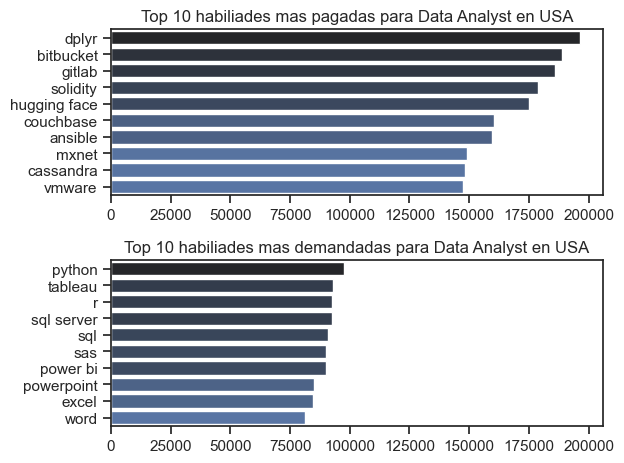

In [16]:
# graficamos
fig, ax = plt.subplots(2,1)

sns.set_theme(style = 'ticks')

# seaborn
sns.barplot(data = df_DA_USA_masPagadas,
            x = 'median',
            y = 'job_skills',
            ax = ax[0],
            hue = 'median',
            palette = 'dark:b_r',
            legend = False)

sns.barplot(data = df_DA_USA_masPopulares,
            x = 'median',
            y = 'job_skills',
            ax = ax[1],
            hue = 'median',
            palette = 'dark:b_r',
            legend = False)

ax[0].set_title('Top 10 habiliades mas pagadas para Data Analyst en USA')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

ax[1].set_title('Top 10 habiliades mas demandadas para Data Analyst en USA')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_xlim(ax[0].get_xlim()) # Limitar eje x del grafico 2 automaticamente en base al eje x del grafico 1 

plt.tight_layout()
plt.show()